Epoch 1/700
2/2 [==============================] - 1s 351ms/step - loss: 1.1077 - accuracy: 0.1075 - val_loss: 1.0874 - val_accuracy: 0.2917
Epoch 2/700
2/2 [==============================] - 0s 47ms/step - loss: 1.0814 - accuracy: 0.4624 - val_loss: 1.0672 - val_accuracy: 0.5417
Epoch 3/700
2/2 [==============================] - 0s 50ms/step - loss: 1.0557 - accuracy: 0.6129 - val_loss: 1.0479 - val_accuracy: 0.5833
Epoch 4/700
2/2 [==============================] - 0s 49ms/step - loss: 1.0326 - accuracy: 0.6559 - val_loss: 1.0298 - val_accuracy: 0.6250
Epoch 5/700
2/2 [==============================] - 0s 47ms/step - loss: 1.0096 - accuracy: 0.6667 - val_loss: 1.0121 - val_accuracy: 0.6250
Epoch 6/700
2/2 [==============================] - 0s 45ms/step - loss: 0.9887 - accuracy: 0.6667 - val_loss: 0.9951 - val_accuracy: 0.6250
Epoch 7/700
2/2 [==============================] - 0s 67ms/step - loss: 0.9676 - accuracy: 0.6667 - val_loss: 0.9787 - val_accuracy: 0.6250
Epoch 8/700
2/2 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


-----------------------------



Pérdida (Loss): 0.16485241055488586
Precisión (Accuracy): 0.9333333373069763
1/1 [==============================] - 0s 92ms/step
-----------------------------




------------------------------


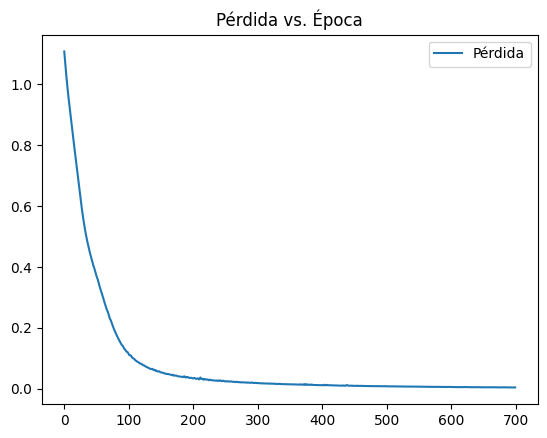

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

# Cargar los archivos de datos Iris para cada clase
data_setosa = np.loadtxt("/content/drive/MyDrive/iris/iris_data/Iris_setosa.txt", skiprows=1, delimiter=",", dtype=str)
data_versicolor = np.loadtxt("/content/drive/MyDrive/iris/iris_data/Iris_versicolor.txt", skiprows=1, delimiter=",", dtype=str)
data_virginica = np.loadtxt("/content/drive/MyDrive/iris/iris_data/Iris_virginica.txt", skiprows=1, delimiter=",", dtype=str)

# Combinar los datos de las tres clases
data = np.concatenate([data_setosa, data_versicolor, data_virginica])

# Dividir los datos en características y etiquetas
X = data[:, 0:4].astype(float)  # Asegurarse de que las características sean de tipo float
y = data[:, 4]

# Convertir las etiquetas de clase a valores numéricos
label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([label_dict[class_name] for class_name in y])

# Normalizar las características
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Entrenar el modelo con un número específico de épocas
num_epochs = 700  # Cambia este valor al número de épocas deseado
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=64, validation_split=0.2)

# Guardar el modelo
model.save('/content/drive/MyDrive/modelosYpesos/iris_normal.h5')

print("-----------------------------")
print("")
print("")
print("")
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida (Loss): {loss}")
print(f"Precisión (Accuracy): {accuracy}")

# Predecir las clases de las flores Iris del conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener la clase con la probabilidad más alta
print("-----------------------------")
print("")
print("")
print("")
# Visualizar el historial de entrenamiento
plt.plot(history.history["loss"], label="Pérdida")
print("")
print("------------------------------")
plt.title("Pérdida vs. Época")
plt.legend()
plt.show()
print("")
print("")

1/1 [==============================] - 0s 89ms/step


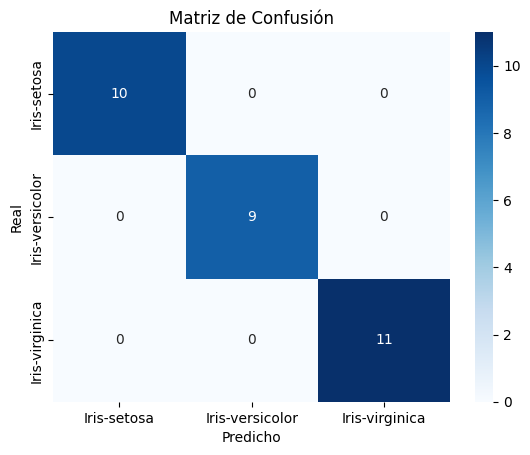

Informe de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [2]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Cargar el modelo entrenado
model = tf.keras.models.load_model('/content/drive/MyDrive/modelosYpesos/iris_normal.h5')

# Cargar los archivos de datos de prueba
data_test = np.loadtxt("/content/drive/MyDrive/iris/model_iris_test.txt", skiprows=1, delimiter=",", dtype=str)

# Dividir los datos de prueba en características y etiquetas
X_test = data_test[:, 0:4].astype(float)  # Asegurarse de que las características sean de tipo float
y_test = data_test[:, 4]

# Convertir etiquetas de texto a números
label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_test = np.array([label_dict[label] for label in y_test])

# Normalizar las características (asegúrate de usar el mismo escalador que en el entrenamiento)
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

# Predecir las clases de las flores Iris del conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener la clase con la probabilidad más alta

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir un informe de clasificación
report = classification_report(y_test, y_pred_classes, target_names=label_dict.keys())
print("Informe de Clasificación:")
print(report)